In [11]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt

import plotly.express as px

In [5]:
df = pd.read_table('unphased.qc.bim', header=None)
df.loc[:, 1].to_csv('variants', index=False, header=False)

In [3]:
df = pd.read_table('plink2.sscore')
X = df.iloc[:, 4:].values

In [4]:
model = pickle.load(open('model.pkl', 'rb'))

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
y = model.predict_proba(X)

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
np.save('preds.npy', y)

In [7]:
model.classes_

array(['BEB', 'CHB', 'ESN', 'FIN', 'GBR', 'JPT', 'KHV', 'LWK', 'MSL',
       'PEL', 'PJL', 'PUR', 'STU', 'TSI', 'YRI'], dtype=object)

In [5]:
preds = model.predict(X)
pd.Series(preds).value_counts()

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


BEB    395236
YRI     71558
LWK      8961
PEL      8412
CHB      1769
FIN      1524
KHV       518
JPT       246
PUR       153
dtype: int64

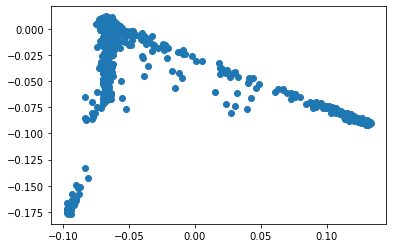

In [6]:
plt.scatter(df.iloc[::50, 4], df.iloc[::50, 5])

In [14]:
df

,#FID,IID,NMISS_ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,SCORE2_AVG,SCORE3_AVG,SCORE4_AVG,SCORE5_AVG,SCORE6_AVG,...,SCORE11_AVG,SCORE12_AVG,SCORE13_AVG,SCORE14_AVG,SCORE15_AVG,SCORE16_AVG,SCORE17_AVG,SCORE18_AVG,SCORE19_AVG,SCORE20_AVG
0,-1,-1,155292,119152,0.104782,-0.077054,0.010472,0.020717,-0.020001,-0.000271,...,-0.008268,-0.003749,-0.003428,-0.004634,-0.007818,0.004544,0.006678,0.003845,-0.007603,0.000498
1,-2,-2,156984,120363,-0.066595,0.006042,0.009092,0.001255,-0.016526,0.001053,...,-0.006475,-0.002677,0.003741,-0.007039,-0.010751,0.005974,0.006801,-0.001861,-0.012500,0.003220
2,-3,-3,156818,120310,-0.070013,0.005874,0.007695,0.000932,-0.018953,-0.002763,...,-0.004281,-0.005365,-0.001767,-0.001629,-0.011088,-0.002494,0.002190,0.005298,-0.009943,0.002012
3,-4,-4,157150,120577,-0.069267,0.005443,0.010495,0.000273,-0.021974,-0.001417,...,-0.008602,-0.014227,-0.000759,-0.003516,-0.010641,0.001622,0.011639,0.007121,-0.008895,0.003829
4,-5,-5,156928,120284,-0.067473,0.008323,0.010148,0.001875,-0.019102,-0.001154,...,-0.004099,-0.004603,0.000648,-0.003288,-0.014662,-0.002109,0.007457,0.003996,-0.008178,0.004628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488372,6025311,6025311,157114,120630,-0.069615,0.005298,0.009277,0.000680,-0.020272,-0.002518,...,-0.008891,-0.009916,-0.004825,-0.001601,-0.006379,-0.005000,0.007498,0.006760,-0.005430,0.003190
488373,6025326,6025326,155318,118940,-0.067673,0.007036,0.010345,-0.000443,-0.021758,-0.002454,...,-0.004135,-0.004188,-0.000687,0.002586,-0.004319,0.003947,0.002855,0.003786,-0.010112,0.004180
488374,6025344,6025344,156818,120175,0.111326,-0.082549,0.009642,0.021685,-0.022095,0.000062,...,-0.007702,-0.010408,-0.006544,-0.001613,-0.007617,0.004714,0.004136,0.005182,-0.003314,0.003340
488375,6025358,6025358,157224,120723,-0.072581,0.009741,0.007274,0.001191,-0.020544,-0.001111,...,-0.006164,-0.011731,0.005223,0.005195,-0.000076,0.004902,0.007395,0.006671,-0.006250,0.003007


In [17]:
df_ukb

,#FID,IID,NMISS_ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,SCORE2_AVG,SCORE3_AVG,SCORE4_AVG,SCORE5_AVG,SCORE6_AVG,...,SCORE11_AVG,SCORE12_AVG,SCORE13_AVG,SCORE14_AVG,SCORE15_AVG,SCORE16_AVG,SCORE17_AVG,SCORE18_AVG,SCORE19_AVG,SCORE20_AVG
0,-1,-1,155292,119152,0.104782,-0.077054,0.010472,0.020717,-0.020001,-0.000271,...,-0.008268,-0.003749,-0.003428,-0.004634,-0.007818,0.004544,0.006678,0.003845,-0.007603,0.000498
1,-2,-2,156984,120363,-0.066595,0.006042,0.009092,0.001255,-0.016526,0.001053,...,-0.006475,-0.002677,0.003741,-0.007039,-0.010751,0.005974,0.006801,-0.001861,-0.012500,0.003220
2,-3,-3,156818,120310,-0.070013,0.005874,0.007695,0.000932,-0.018953,-0.002763,...,-0.004281,-0.005365,-0.001767,-0.001629,-0.011088,-0.002494,0.002190,0.005298,-0.009943,0.002012
3,-4,-4,157150,120577,-0.069267,0.005443,0.010495,0.000273,-0.021974,-0.001417,...,-0.008602,-0.014227,-0.000759,-0.003516,-0.010641,0.001622,0.011639,0.007121,-0.008895,0.003829
4,-5,-5,156928,120284,-0.067473,0.008323,0.010148,0.001875,-0.019102,-0.001154,...,-0.004099,-0.004603,0.000648,-0.003288,-0.014662,-0.002109,0.007457,0.003996,-0.008178,0.004628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488372,6025311,6025311,157114,120630,-0.069615,0.005298,0.009277,0.000680,-0.020272,-0.002518,...,-0.008891,-0.009916,-0.004825,-0.001601,-0.006379,-0.005000,0.007498,0.006760,-0.005430,0.003190
488373,6025326,6025326,155318,118940,-0.067673,0.007036,0.010345,-0.000443,-0.021758,-0.002454,...,-0.004135,-0.004188,-0.000687,0.002586,-0.004319,0.003947,0.002855,0.003786,-0.010112,0.004180
488374,6025344,6025344,156818,120175,0.111326,-0.082549,0.009642,0.021685,-0.022095,0.000062,...,-0.007702,-0.010408,-0.006544,-0.001613,-0.007617,0.004714,0.004136,0.005182,-0.003314,0.003340
488375,6025358,6025358,157224,120723,-0.072581,0.009741,0.007274,0.001191,-0.020544,-0.001111,...,-0.006164,-0.011731,0.005223,0.005195,-0.000076,0.004902,0.007395,0.006671,-0.006250,0.003007


In [42]:
df_1kg = pd.read_table('new_proj.sscore')
df_1kg = df_1kg.drop(['#FID', 'ALLELE_CT', 'NAMED_ALLELE_DOSAGE_SUM'], axis=1)
df_1kg['pop'] = '1kg'
df_ukb = pd.read_table('ukb_1kg_projections.sscore')
df_ukb = df_ukb.drop(['#FID', 'NMISS_ALLELE_CT', 'NAMED_ALLELE_DOSAGE_SUM'], axis=1)[::100]
df_ukb['pop'] = 'ukb'
df_ukb.columns = df_1kg.columns
df = pd.concat([df_ukb, df_1kg])

In [28]:
px.scatter(df, x='PC1_AVG', y='PC2_AVG', color='pop').write_html('1kg.html')

In [43]:
px.scatter(df, x='PC1_AVG', y='PC2_AVG', color='pop')

In [45]:
df = pd.read_table('ukb_1kg_projections.sscore')
X = df.iloc[:, 4:].values
model = pickle.load(open('model.pkl', 'rb'))
y = model.predict_proba(X)
np.save('probs.npy', y)

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature n

In [46]:
preds = model.predict(X)
pd.Series(preds).value_counts()

/trinity/home/s.mishra/.conda/envs/fl/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



GBR    453581
PJL      8537
TSI      7234
PUR      6161
LWK      4031
YRI      3219
CHB      1560
STU      1191
BEB       928
KHV       875
PEL       435
FIN       287
JPT       279
MSL        54
ESN         5
dtype: int64

In [24]:
df_1kg = pd.read_table('1kg.csv', sep=',')
df_ukb = pd.read_table('plink2.sscore')
df_ukb = df_ukb.drop(['#FID', 'NMISS_ALLELE_CT', 'NAMED_ALLELE_DOSAGE_SUM'], axis=1)[::100]
df_ukb['pop'] = 'ukb'
df_ukb.columns = df_1kg.columns

df = pd.concat([df_ukb, df_1kg])